<a href="https://colab.research.google.com/github/Oooscar8/UBC-CPEN355-Machine-Learning/blob/main/MNIST_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Dataset Analysis Assignment
**Name**: Alex Sun

**Student ID**: 67050294

## Q1. Load the MNIST dataset from sklearn, and explain the fields of the loaded dataset

### 1. Loading Required Libraries and Dataset
First, we'll import the necessary libraries and load the MNIST dataset from scikit-learn.

In [7]:
# Import required libraries
from sklearn.datasets import load_digits
import numpy as np

# Load the MNIST dataset
digits = load_digits()

### 2. Basic Dataset Information
Let's examine the basic structure and properties of the loaded dataset.

In [8]:
# Display dataset dimensions and basic information
print("Dataset Dimensions:")
print("-" * 50)
print(f"Total number of samples: {len(digits.data)}")
print(f"Data shape: {digits.data.shape}")
print(f"Target shape: {digits.target.shape}")
print(f"Images shape: {digits.images.shape}")

print("\nData Value Ranges:")
print("-" * 50)
print(f"Feature values range: {digits.data.min()} to {digits.data.max()}")
print(f"Target values range: {digits.target.min()} to {digits.target.max()}")

# Display sample distribution
print("\nSample Distribution:")
print("-" * 50)
unique, counts = np.unique(digits.target, return_counts=True)
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} samples")

Dataset Dimensions:
--------------------------------------------------
Total number of samples: 1797
Data shape: (1797, 64)
Target shape: (1797,)
Images shape: (1797, 8, 8)

Data Value Ranges:
--------------------------------------------------
Feature values range: 0.0 to 16.0
Target values range: 0 to 9

Sample Distribution:
--------------------------------------------------
Digit 0: 178 samples
Digit 1: 182 samples
Digit 2: 177 samples
Digit 3: 183 samples
Digit 4: 181 samples
Digit 5: 182 samples
Digit 6: 181 samples
Digit 7: 179 samples
Digit 8: 174 samples
Digit 9: 180 samples


### 3. Dataset Fields Explanation
Based on the scikit-learn documentation, the MNIST dataset contains the following key fields:

#### 1. digits.data (Feature Matrix)
- Shape: (1797, 64)
- Contains 1797 samples, each with 64 features
- Each feature represents one pixel intensity value
- Values are scaled between 0 and 16
- Each sample is a flattened 8x8 image

#### 2. digits.target (Labels)
- Shape: (1797,)
- Contains the actual digit (0-9) for each sample
- One label per image
- Integer values from 0 to 9

#### 3. digits.images (Original Images)
- Shape: (1797, 8, 8)
- Contains the original 8x8 grayscale images
- Useful for visualization
- Same data as digits.data but in 2D format

#### 4. digits.DESCR
- Contains the full dataset description
- Includes metadata and creation information

## Q2: Data Distribution Visualization and Balance Analysis
In this section, we'll create a bar plot to visualize the distribution of digits in the dataset and analyze whether it's balanced.

### 1. Creating Distribution Visualization
Let's use matplotlib to create a bar plot showing the number of samples for each digit.

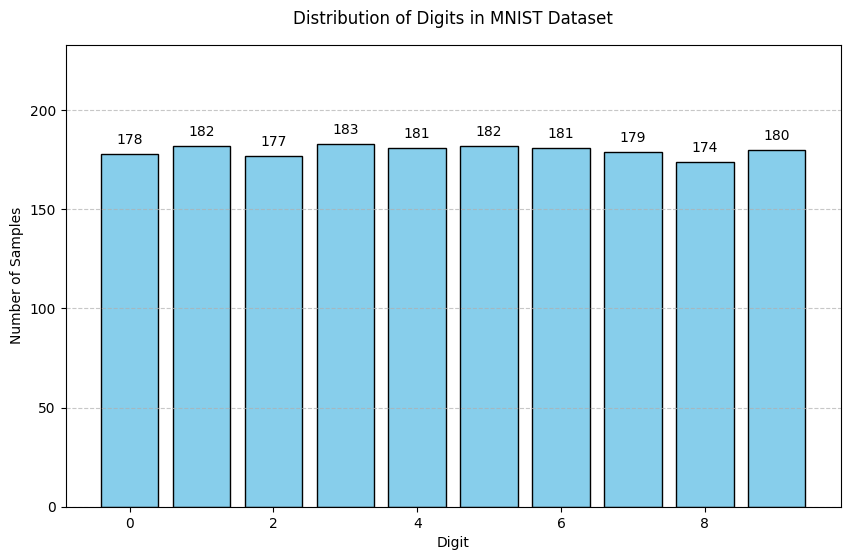


Exact Distribution:
--------------------------------------------------
Digit 0: 178 samples (9.9%)
Digit 1: 182 samples (10.1%)
Digit 2: 177 samples (9.8%)
Digit 3: 183 samples (10.2%)
Digit 4: 181 samples (10.1%)
Digit 5: 182 samples (10.1%)
Digit 6: 181 samples (10.1%)
Digit 7: 179 samples (10.0%)
Digit 8: 174 samples (9.7%)
Digit 9: 180 samples (10.0%)


In [9]:
import matplotlib.pyplot as plt

# Calculate the distribution
unique_digits, counts = np.unique(digits.target, return_counts=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(unique_digits, counts, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Digits in MNIST Dataset', fontsize=12, pad=15)
plt.xlabel('Digit', fontsize=10)
plt.ylabel('Number of Samples', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=10)

# Set the y-axis to start from 0
plt.ylim(0, max(counts) + 50)

plt.show()

# Print the exact distribution
print("\nExact Distribution:")
print("-" * 50)
for digit, count in zip(unique_digits, counts):
    print(f"Digit {digit}: {count} samples ({count/len(digits.target)*100:.1f}%)")

### 2. Balance Analysis
Based on the visualization and percentages above, this is a well-balanced dataset. Each digit class contains approximately 180 samples (about 10% of the data), with only minor variations between classes. These small differences should not significantly impact model training.

## Q3: Visualizing a Sample MNIST Digit

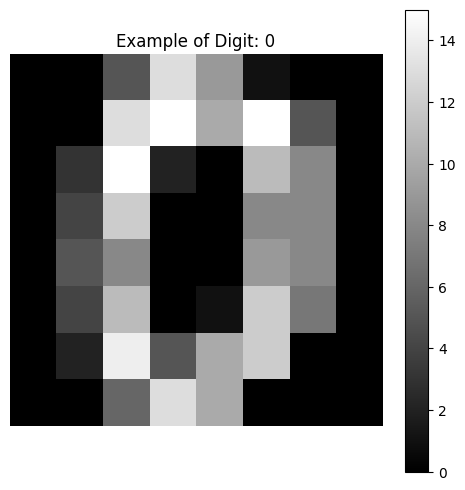

This is a sample image of digit: 0
Image shape: (8, 8)
Pixel value range: 0.0 to 15.0


In [11]:
# Get a sample image (let's use the first image)
sample_image = digits.images[0]
sample_label = digits.target[0]

# Create the visualization
plt.figure(figsize=(6, 6))
plt.imshow(sample_image, cmap='gray')
plt.title(f'Example of Digit: {sample_label}')
plt.colorbar()
plt.axis('off')
plt.show()

print(f"This is a sample image of digit: {sample_label}")
print(f"Image shape: {sample_image.shape}")
print(f"Pixel value range: {sample_image.min()} to {sample_image.max()}")

The image above shows a sample digit from the MNIST dataset. The grayscale visualization represents pixel intensities where darker colors indicate higher values. Each image is an 8x8 pixel grid.

## Q4: Splitting Data into Train/Validation/Test Sets
We'll split the MNIST data into three sets:
- Training set: 70%
- Validation set: 20%
- Test set: 10%

In [12]:
from sklearn.model_selection import train_test_split

# First split: Split into train(70%) and temp(30%)
X = digits.data
y = digits.target

# Step 1: First split to separate test set (90% temp, 10% test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Step 2: Split temp into train and validation (70% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.22, random_state=42  # 0.22 of 90% is 20% of total
)

# Print the shapes and distributions
print("Dataset Splits:")
print("-" * 50)
print(f"Total dataset size: {len(X)}")
print(f"\nTraining set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

# Verify distribution of digits in each split
print("\nClass Distribution in Each Split:")
print("-" * 50)
print("Training set:", np.bincount(y_train))
print("Validation set:", np.bincount(y_val))
print("Test set:", np.bincount(y_test))

Dataset Splits:
--------------------------------------------------
Total dataset size: 1797

Training set: 1261 samples (70.2%)
Validation set: 356 samples (19.8%)
Test set: 180 samples (10.0%)

Class Distribution in Each Split:
--------------------------------------------------
Training set: [133 132 128 124 112 123 125 129 130 125]
Validation set: [28 39 32 42 44 37 37 31 36 30]
Test set: [17 11 17 17 25 22 19 19  8 25]


The data has been successfully split into three sets while maintaining proper proportions (70/20/10 split), random distribution of samples and stratified distribution of digits across all sets

These splits will be used for:
- Training set: Model training
- Validation set: Model tuning
- Test set: Final evaluation

## Q5: Support Vector Machine (SVM) Classifier Explanation

Let me visualize and explain the concept of SVM:

<ipython-input-26-5d8a8282cce2>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y_down, 'k--', color='gray', label='Margin')
<ipython-input-26-5d8a8282cce2>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y_up, 'k--', color='gray')


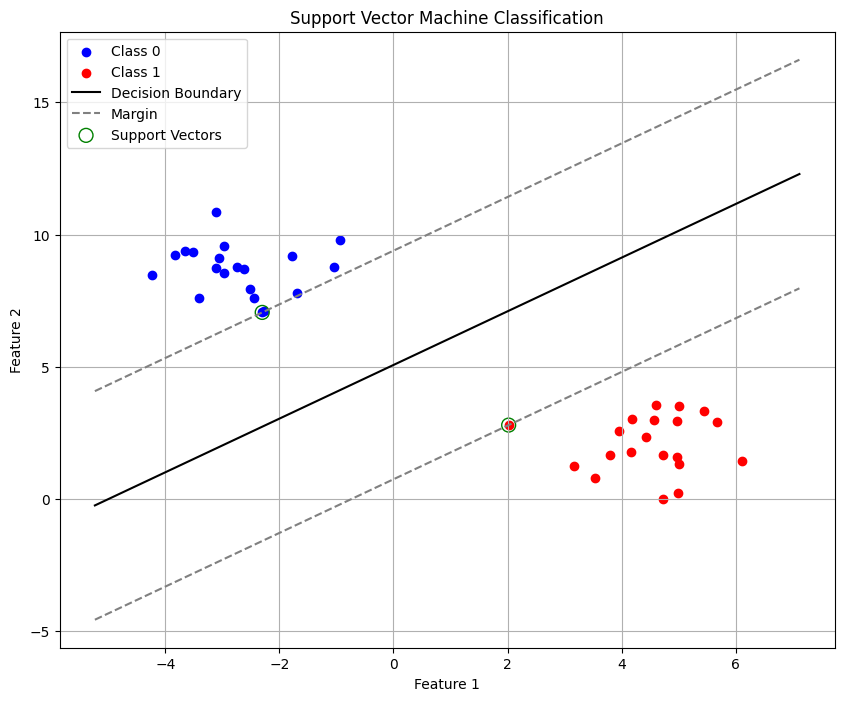

Number of support vectors: 2


In [26]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Create a sample dataset with two classes
X, y = make_blobs(n_samples=40, centers=2, random_state=42)

# Create and train the SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Get hyperplane parameters
w = clf.coef_[0]
b = clf.intercept_[0]
# Calculate slope and intercept of the decision boundary
slope = -w[0] / w[1]
intercept = -b / w[1]

# Create the plot
plt.figure(figsize=(10, 8))

# Plot data points
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], color='blue', label='Class 0')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], color='red', label='Class 1')

# Get data range for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

# Plot decision boundary
x = np.linspace(x_min, x_max, 100)
y = slope * x + intercept
plt.plot(x, y, '-', color='black', label='Decision Boundary')

# Plot margins
margin = 1 / np.sqrt(np.sum(w ** 2))
y_down = y - np.sqrt(1 + slope**2) * margin
y_up = y + np.sqrt(1 + slope**2) * margin
plt.plot(x, y_down, 'k--', color='gray', label='Margin')
plt.plot(x, y_up, 'k--', color='gray')

# Highlight support vectors
support_vectors = clf.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
           color='green', marker='o', s=100,
           facecolors='none', label='Support Vectors')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Support Vector Machine Classification')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Print the number of support vectors
print(f"Number of support vectors: {len(support_vectors)}")

As shown in the picture above ,the Support Vector Machine (SVM) classifier works by finding an optimal decision boundary (solid black line) that maximally separates two classes of data points (blue and red). The decision boundary is chosen to maximize the margin (space between dashed gray lines) between the classes. The points that lie closest to the decision boundary, marked with green circles, are called support vectors - these critical points effectively define the boundary and its margins. The SVM algorithm positions the decision boundary such that it maintains the largest possible equal distance from these support vectors, creating a robust classifier that can generalize well to new data. Any new point will be classified based on which side of the decision boundary it falls on.

## Q6: Training SVM Classifier

In [29]:
# Import required libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Initialize the scaler and scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on validation set
y_val_pred = svm_classifier.predict(X_val_scaled)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print results
print("SVM Training Results:")
print("-" * 50)
print(f"Training set size: {len(X_train)} samples")
print(f"Validation set size: {len(X_val)} samples")
print(f"Validation accuracy: {val_accuracy:.4f}")

# Get support vectors
n_support_vectors = svm_classifier.n_support_
print(f"\nNumber of support vectors: {sum(n_support_vectors)}")
print(f"Support vectors per class: {n_support_vectors}")

SVM Training Results:
--------------------------------------------------
Training set size: 1261 samples
Validation set size: 356 samples
Validation accuracy: 0.9691

Number of support vectors: 404
Support vectors per class: [27 49 40 36 38 37 29 40 56 52]


The SVM classifier was trained with the following steps:

1. Data Preprocessing:
   - Features were standardized using StandardScaler
   - Training and validation data were scaled

2. Model Configuration:
   - Linear kernel SVM
   - Random state set for reproducibility

3. Training:
   - Model trained on scaled training data
   - Support vectors automatically determined

4. Evaluation:
   - Model tested on validation set
   - Accuracy calculated for performance assessment

## Q7: Model Evaluation Metrics
Evaluating the SVM classifier performance on the test dataset using multiple metrics.

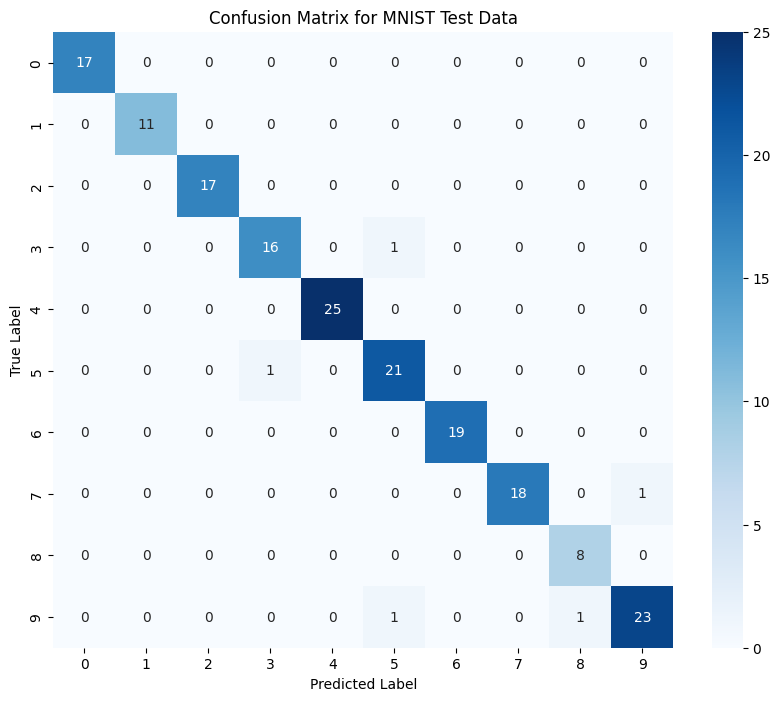

Model Performance Metrics:
--------------------------------------------------
Accuracy:  0.9722
Precision: 0.9701
Recall:    0.9763
F1-Score:  0.9727

Detailed Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17
           3       0.94      0.94      0.94        17
           4       1.00      1.00      1.00        25
           5       0.91      0.95      0.93        22
           6       1.00      1.00      1.00        19
           7       1.00      0.95      0.97        19
           8       0.89      1.00      0.94         8
           9       0.96      0.92      0.94        25

    accuracy                           0.97       180
   macro avg       0.97      0.98      0.97       180
weighted avg       0.97      0.97      0.97       180



In [31]:
# Import required libraries for evaluation
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on test set
X_test_scaled = scaler.transform(X_test)
y_test_pred = svm_classifier.predict(X_test_scaled)

# 1. Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# 2. Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MNIST Test Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 3. Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
# For multi-class, we use 'macro' averaging
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')

# 4. Print all metrics
print("Model Performance Metrics:")
print("-" * 50)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# 5. Print detailed classification report
print("\nDetailed Classification Report:")
print("-" * 50)
print(classification_report(y_test, y_test_pred))

### Evaluation Metrics Explanation:

1. **Confusion Matrix**: Shows the count of true vs predicted labels for each class

2. **Performance Metrics**:
   - Accuracy: Proportion of correct predictions
   - Precision: Ability to avoid false positives
   - Recall: Ability to find all positive cases
   - F1-Score: Harmonic mean of precision and recall

The classification report provides per-class performance metrics, helping identify which digits are easier or harder to classify.

## Q8: Random Forest Classifier Explanation

Let me explain how the Random forest classifier works through visulization:

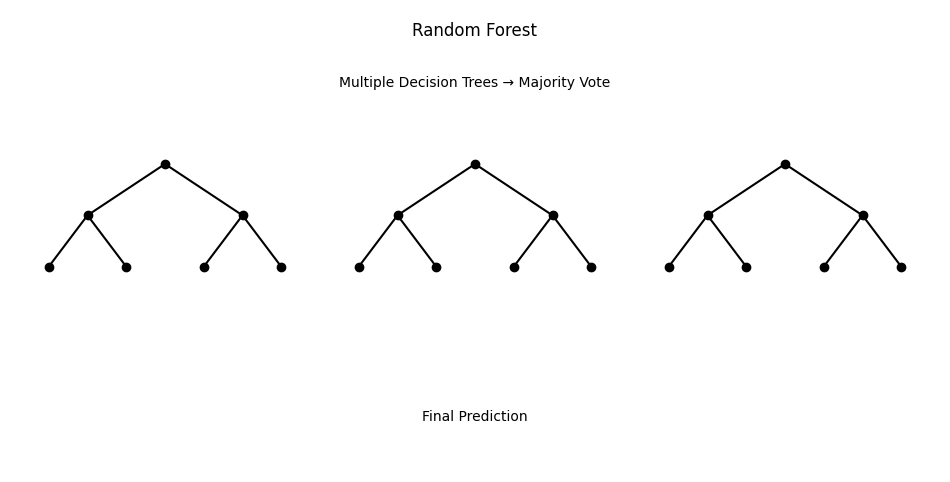

In [32]:
# Create a simple visualization of Random Forest concept
plt.figure(figsize=(12, 6))

def draw_simple_tree(x, y, dx, dy, level, max_level=3):
    if level >= max_level:
        return
    # Draw node
    plt.plot(x, y, 'ko')
    # Draw left branch
    if level < max_level-1:
        plt.plot([x, x-dx], [y, y-dy], 'k-')
        draw_simple_tree(x-dx, y-dy, dx/2, dy, level+1, max_level)
    # Draw right branch
    if level < max_level-1:
        plt.plot([x, x+dx], [y, y-dy], 'k-')
        draw_simple_tree(x+dx, y-dy, dx/2, dy, level+1, max_level)

# Draw multiple trees
tree_positions = [2, 6, 10]
plt.text(6, 8.5, 'Random Forest', horizontalalignment='center', fontsize=12)
plt.text(6, 7.5, 'Multiple Decision Trees → Majority Vote', horizontalalignment='center', fontsize=10)

for pos in tree_positions:
    draw_simple_tree(pos, 6, 1, 1, 0)

plt.text(6, 1, 'Final Prediction', horizontalalignment='center', fontsize=10)
plt.xlim(0, 12)
plt.ylim(0, 9)
plt.axis('off')
plt.show()

A Random Forest classifier is an ensemble learning method that operates by combining multiple decision trees to create a more robust and accurate model. As shown in the visualization:

Each tree in the forest is trained independently with:
- Random subset of training data (bootstrap sampling)
- Random subset of features at each split
- Different decision paths and criteria

The final prediction is determined by majority voting among all trees. When a new sample needs to be classified, it is run through each tree, and the class that receives the most "votes" becomes the final prediction. This ensemble approach reduces overfitting and improves generalization compared to single decision trees, making Random Forests a powerful and reliable classification method.

## Q9: Random Forest Classifier Training and Comparison
Training a Random Forest classifier on the same MNIST data and comparing performance with SVM.

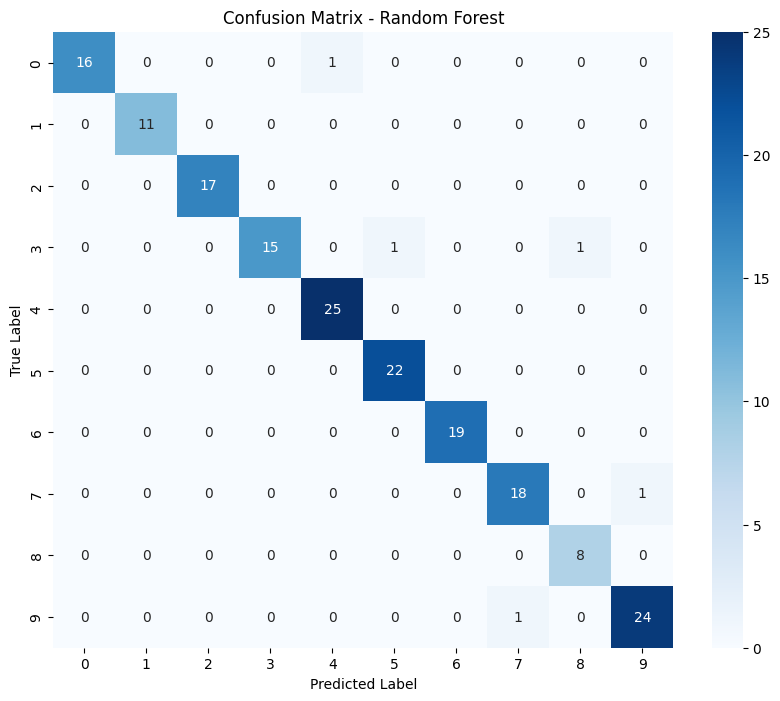

Model Performance Comparison:
--------------------------------------------------
Metric                 SVM   Random Forest
--------------------------------------------------
Accuracy            0.9722          0.9722
Precision           0.9701          0.9714
Recall              0.9763          0.9731
F1-Score            0.9727          0.9714


In [34]:
# Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions
rf_val_pred = rf_classifier.predict(X_val_scaled)
rf_test_pred = rf_classifier.predict(X_test_scaled)

# Calculate metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_test_pred)
rf_precision = precision_score(y_test, rf_test_pred, average='macro')
rf_recall = recall_score(y_test, rf_test_pred, average='macro')
rf_f1 = f1_score(y_test, rf_test_pred, average='macro')

# Get SVM metrics (from Q6 and Q7)
svm_accuracy = accuracy_score(y_test, y_test_pred)
svm_precision = precision_score(y_test, y_test_pred, average='macro')
svm_recall = recall_score(y_test, y_test_pred, average='macro')
svm_f1 = f1_score(y_test, y_test_pred, average='macro')

# Plot confusion matrix for Random Forest
plt.figure(figsize=(10, 8))
cm_rf = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print comparison
print("Model Performance Comparison:")
print("-" * 50)
print(f"{'Metric':<15} {'SVM':>10} {'Random Forest':>15}")
print("-" * 50)
print(f"{'Accuracy':<15} {svm_accuracy:>10.4f} {rf_accuracy:>15.4f}")
print(f"{'Precision':<15} {svm_precision:>10.4f} {rf_precision:>15.4f}")
print(f"{'Recall':<15} {svm_recall:>10.4f} {rf_recall:>15.4f}")
print(f"{'F1-Score':<15} {svm_f1:>10.4f} {rf_f1:>15.4f}")

### Compare evaluation metrics
Comparing the SVM (Q6) and Random Forest performance on the MNIST dataset:

1. **Accuracy (0.9722 vs 0.9722)**:

Both models achieved identical accuracy, which shows both classifiers are equally good at overall prediction

2. **Precision (0.9701 vs 0.9714)**:

Random Forest slightly higher (+0.0013). Both models show strong precision, indicating low false positives

3. **Recall (0.9763 vs 0.9731)**:

SVM slightly higher (+0.0032). Both models effectively identify true positives

4. **F1-Score (0.9727 vs 0.9714)**:

SVM slightly higher (+0.0013), which indicates marginally better balance of precision and recall

Overall, both models perform remarkably well with very similar metrics, suggesting that either would be suitable for this MNIST classification task. The differences in performance are minimal (less than 0.5%), indicating that both approaches are equally effective for this particular dataset.